In [1]:
%%html
<style>
table {align:left;display:block}  # to align html tables to left
</style>

# Dataquest - Data Cleaning Project Walkthrough <br/> <br/> Project Title: Star Wars Survey

## 1) Introduction

#### Background

Provided by: [Dataquest.io](https://www.dataquest.io/)

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including the following:

Columns | Description
--- | ---
RespondentID | An anonymized ID for the respondent (person taking the survey)
Gender | the respondent's gender
Age | the respondent's age
Household Income | the respondent's income
Education | the respondent's education level
Location (Census Region) | the respondent's location
Have you seen any of the 6 films in the Star Wars franchise? | a Yes or No response
Do you consider yourself to be a fan of the Star Wars film franchise? | a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

In [2]:
# read and load dataset
# downloaded file changed extension to .csv and renamed to 'star_wars.csv' prior to loading in notebook
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# explore data
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [3]:
# review columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

#### Findings (Introduction):

Based on review of the first few rows, it would appear the row 0 is not answered by a true respondent, and hence we suggest to either ignore and drop this row in our data cleaning.

In [4]:
# drop row 0 and save it to a new dataset copy for further data cleaning

sw = star_wars.copy()
sw.drop(labels=0, axis=0, inplace=True)

sw.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


## 2) Cleaning and Mapping Yes/No Columns

Provided by: [Dataquest.io](https://www.dataquest.io/)

Taking a look at the next two columns:

- **Have you seen any of the 6 films in the Star Wars franchise?**
- **Do you consider yourself to be a fan of the Star Wars film franchise?**

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN.

Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [5]:
# Convert the 'Have you seen any of the 6 films in the Star Wars franchise?' column to the Boolean type.


# review frequency tables to see unique values, and replace using .map()
print(sw['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))

mapping = {'Yes': True,
           'No': False
          }

# map
sw['Have you seen any of the 6 films in the Star Wars franchise?'] = sw['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping)

# review transformation
sw['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
# Convert the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column to the Boolean type.


# review frequency tables to see unique values, and replace using .map()
print(sw['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

mapping = {'Yes': True,
           'No': False
          }

# map
sw['Do you consider yourself to be a fan of the Star Wars film franchise?'] = sw['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapping)

# review transformation
sw['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## 3) Cleaning and Mapping Checkbox Columns

Provided by: [Dataquest.io](https://www.dataquest.io/)

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, **Which of the following Star Wars films have you seen? Please select all that apply.**

The columns for this question are:

Columns | Description
--- | ---
Which of the following Star Wars films have you seen? Please select all that apply. | whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
Unnamed: 4 | whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
Unnamed: 5 | whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
Unnamed: 6 | whether or not the respondent saw Star Wars: Episode IV A New Hope.
Unnamed: 7 | whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
Unnamed: 8 | whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [7]:
# Convert the movies seen columns to the Boolean type.


# review frequency tables to see unique values, and replace using .map()
import numpy as np

print(sw.iloc[:, 3].value_counts(dropna=False),'\n')
print(sw.iloc[:, 4].value_counts(dropna=False),'\n')
print(sw.iloc[:, 5].value_counts(dropna=False),'\n')
print(sw.iloc[:, 6].value_counts(dropna=False),'\n')
print(sw.iloc[:, 7].value_counts(dropna=False),'\n')
print(sw.iloc[:, 8].value_counts(dropna=False))

mapping_1 = {'Star Wars: Episode I  The Phantom Menace': True,
           np.nan: False
          }

mapping_2 = {'Star Wars: Episode II  Attack of the Clones': True,
           np.nan: False
          }

mapping_3 = {'Star Wars: Episode III  Revenge of the Sith': True,
           np.nan: False
          }

mapping_4 = {'Star Wars: Episode IV  A New Hope': True,
           np.nan: False
          }

mapping_5 = {'Star Wars: Episode V The Empire Strikes Back': True,
           np.nan: False
          }

mapping_6 = {'Star Wars: Episode VI Return of the Jedi': True,
           np.nan: False
          }

# map
sw.iloc[:, 3] = sw.iloc[:, 3].map(mapping_1)
sw.iloc[:, 4] = sw.iloc[:, 4].map(mapping_2)
sw.iloc[:, 5] = sw.iloc[:, 5].map(mapping_3)
sw.iloc[:, 6] = sw.iloc[:, 6].map(mapping_4)
sw.iloc[:, 7] = sw.iloc[:, 7].map(mapping_5)
sw.iloc[:, 8] = sw.iloc[:, 8].map(mapping_6)


Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64 

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64 

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64 

Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64 

Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64 

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64


In [8]:
# review transformations
print(sw.iloc[:, 3].value_counts(dropna=False),'\n')
print(sw.iloc[:, 4].value_counts(dropna=False),'\n')
print(sw.iloc[:, 5].value_counts(dropna=False),'\n')
print(sw.iloc[:, 6].value_counts(dropna=False),'\n')
print(sw.iloc[:, 7].value_counts(dropna=False),'\n')
print(sw.iloc[:, 8].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64 

False    615
True     571
Name: Unnamed: 4, dtype: int64 

False    636
True     550
Name: Unnamed: 5, dtype: int64 

True     607
False    579
Name: Unnamed: 6, dtype: int64 

True     758
False    428
Name: Unnamed: 7, dtype: int64 

True     738
False    448
Name: Unnamed: 8, dtype: int64


In [9]:
# Rename each of the columns above so the names are more intuitive. We recommend using seen_1 to indicate whether the respondent saw Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.

# review old column names
print(sw.columns[3:9],'\n')

mapping = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
           'Unnamed: 4': 'seen_2',
           'Unnamed: 5': 'seen_3',
           'Unnamed: 6': 'seen_4',
           'Unnamed: 7': 'seen_5',
           'Unnamed: 8': 'seen_6'
          }


# transform column names
sw.rename(mapper=mapping, axis=1, inplace=True)

# review transformations
sw.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object') 



Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

## 4) Cleaning The Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. **1** means the film was the most favorite, and **6** means it was the least favorite. Each of the following columns can contain the value **1, 2, 3, 4, 5, 6, or NaN**:

Columns | Description
--- | ---
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. | How much the respondent liked Star Wars: Episode I The Phantom Menace
Unnamed: 10 | How much the respondent liked Star Wars: Episode II Attack of the Clones
Unnamed: 11 | How much the respondent liked Star Wars: Episode III Revenge of the Sith
Unnamed: 12 | How much the respondent liked Star Wars: Episode IV A New Hope
Unnamed: 13 | How much the respondent liked Star Wars: Episode V The Empire Strikes Back
Unnamed: 14 | How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [10]:
# review data content
print(star_wars.iloc[:, 9].value_counts(),'\n')
print(star_wars.iloc[:, 10].value_counts(),'\n')
print(star_wars.iloc[:, 11].value_counts(),'\n')
print(star_wars.iloc[:, 12].value_counts(),'\n')
print(star_wars.iloc[:, 13].value_counts(),'\n')
print(star_wars.iloc[:, 14].value_counts())

4                                           237
6                                           168
3                                           130
1                                           129
5                                           100
2                                            71
Star Wars: Episode I  The Phantom Menace      1
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64 

5                                              300
4                                              183
2                                              116
3                                              103
6                                              102
1                                               32
Star Wars: Episode II  Attack of the Clones      1
Name: Unnamed: 10, dtype: int64 

6                                              217
5                                              203
4      

In [11]:
# Convert each of the columns above to a float type.


# review old datatypes
print(sw.iloc[:, 9:15].dtypes,'\n')

# transform datatype to float
sw[star_wars.columns[9:15]] = sw[sw.columns[9:15]].astype(float)

# review transformations
print(sw.iloc[:, 9:15].dtypes)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    object
Unnamed: 10                                                                                                                                      object
Unnamed: 11                                                                                                                                      object
Unnamed: 12                                                                                                                                      object
Unnamed: 13                                                                                                                                      object
Unnamed: 14                                                                                                                                      object
dtype: object 

Please rank the Star Wars films in order of preference with 1 being your

In [12]:
# Give each column a more descriptive name. Eg. ranking_1, ranking_2, and so on.


# review old column names
print(sw.columns[9:15],'\n')

# create mapping variable
mapping = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
           'Unnamed: 10': 'ranking_2',
           'Unnamed: 11': 'ranking_3',
           'Unnamed: 12': 'ranking_4',
           'Unnamed: 13': 'ranking_5',
           'Unnamed: 14': 'ranking_6'
          }

# transform column names
sw.rename(mapper=mapping, axis=1, inplace=True)

# review transformation
print(sw.columns[9:15])

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object') 

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


## 5) Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker.

In [13]:
# Compute the mean of each ranking columns for comparision purposes
df_rank = sw.iloc[:, 9:15].mean()
print(df_rank)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


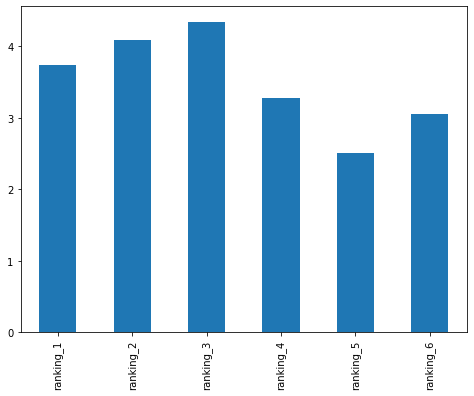

In [14]:
# plot bar charts for visualisation
import matplotlib.pyplot as plt  # import data visualisation library
%matplotlib inline

df_rank.plot(kind='bar', figsize=(8, 6))
plt.show()

#### Findings (Finding The Highest-Ranked Movie):

The lower the ranking, the better *(1 being your favorite film in the franchise and 6 being your least favorite film)*.

Based on the above bar charts, the 5th movie (Star Wars: Episode V The Empire Strikes Back) represented by **ranking_5**, would appear to be the highest rated among the 6 star wars movie.

One possible explanation is that this may be the most seen star wars movie.

## 6) Finding The Most Viewed Movie

Earlier in this project, we cleaned up the **'seen'** columns and converted their values to the Boolean type. 

That means we can figure out how many people have seen each movie just by taking the sum of the column (Boolean values - True means 1, False means 0).

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


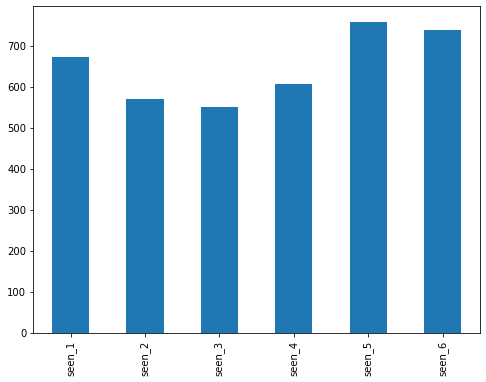

In [15]:
# Use the df.sum() method to compute the sum of each seen columns.
df_seen = sw.iloc[:, 3:9].sum()
print(df_seen)

# Make a bar chart of each ranking. 
df_seen.plot(kind='bar', figsize=(8, 6))
plt.show()

In [16]:
# create table for correlation
df_rank_seen = sw.corr().iloc[2:8, 8:16]
df_rank_seen

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
seen_1,0.067218,0.013792,-0.067711,-0.146503,0.066301,0.079381
seen_2,0.246639,0.041711,-0.102122,-0.160216,-0.014686,-0.002038
seen_3,0.308085,0.134838,-0.181001,-0.147843,-0.049921,-0.053451
seen_4,0.440301,0.365598,0.174842,-0.554932,-0.136834,-0.143364
seen_5,0.385813,0.388224,0.248817,-0.130101,-0.422226,-0.368499
seen_6,0.431521,0.391197,0.237803,-0.159497,-0.272718,-0.509609


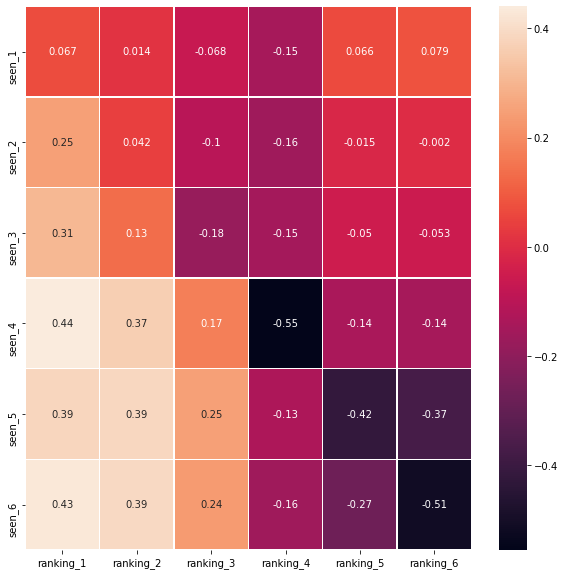

In [17]:
# plot a heatmap for correlation
# source: https://stackoverflow.com/questions/39409866/correlation-heatmap
# source: https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_rank_seen, annot=True, linewidths=.5, ax=ax)
plt.show()


#### Findings (Finding The Most Viewed Movie):

Based on the above bar charts, the 5th movie (Star Wars: Episode V The Empire Strikes Back) represented by **seen_5**, would appear to be the most viewed among the 6 star wars movie.

For the correlation heatmap above, we are only interested in the relationship represented by the diagonal line from top left to bottom right where views correlates with ranking (eg. seen_1 vs ranking_1, seen_2 vs ranking_2 ..etc).

This also corroborates that the highest rated star wars movie is also the most viewed movie (movie 5), and this strong negative correlation is also present for movie 5 and movie 6.

## 7) Exploring The Data By Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

Columns | Description
--- | ---
Do you consider yourself to be a fan of the Star Wars film franchise? | True or False
Do you consider yourself to be a fan of the Star Trek franchise? | Yes or No
Gender | Male or Female

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the Gender column like this:

```
males = sw[sw['Gender'] == 'Male']
females = sw[sw['Gender'] == 'Female']
```

The subsets allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

In [18]:
# Split the data into two groups based on one of the binary columns above.

# Let us choose to examine in detail for the 1st category, which is "Do you consider yourself to be a fan of the Star Wars film franchise?"


# review the column values
print(sw['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False),'\n')

# There are NAN values, let's limit the scope of analysis and ignore them for now

fans_yes = sw[sw['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]

fans_no = sw[sw['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

# review transformations
print(fans_yes.shape,'\n')
fans_yes.head(2)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 

(552, 38) 



,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [19]:
# review transformations
print(fans_no.shape,'\n')
fans_no.head(2)

(284, 38) 



,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


## Looking for the most highly rated and most viewed movie among star wars film fans and non-fans

In [23]:
# Compute the mean of each ranking columns for comparision purposes
df_rank_fans_yes = fans_yes.iloc[:, 9:15].mean()
print('Ranking for film fans:')
print(df_rank_fans_yes, '\n')

df_rank_fans_no = fans_no.iloc[:, 9:15].mean()
print('Ranking for film non-fans:')
print(df_rank_fans_no)

Ranking for film fans:
ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64 

Ranking for film non-fans:
ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64


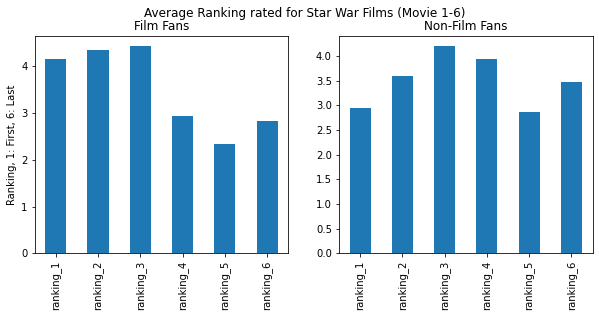

In [72]:
# plot bar charts for visualisation (Ranking)

# create chart layout
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
df_rank_fans_yes.plot(kind='bar', ax=ax1, title='Film Fans')
df_rank_fans_no.plot(kind='bar', ax=ax2, title='Non-Film Fans')
ax1.set_ylabel(ylabel='Ranking, 1: First, 6: Last')
fig.suptitle('Average Ranking rated for Star War Films (Movie 1-6)', fontsize=12)
plt.show()

In [79]:
# Use the df.sum() method to compute the sum of each seen columns.
df_seen_fans_yes = fans_yes.iloc[:, 3:9].sum()
df_seen_fans_no = fans_no.iloc[:, 3:9].sum()
print('Number of views for film fans:')
print(df_seen_fans_yes,'\n')
print('Number of views for non-film fans:')
print(df_seen_fans_no)

Number of views for film fans:
seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64 

Number of views for non-film fans:
seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64


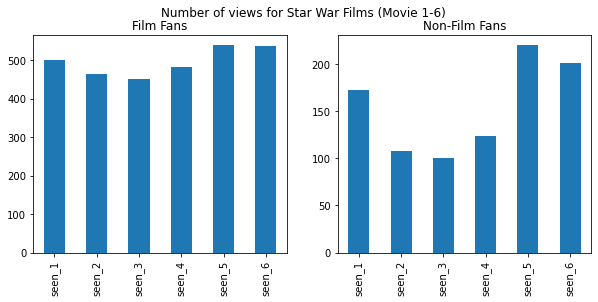

In [77]:
# Make a bar chart for each view
      
# create chart layout
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
df_seen_fans_yes.plot(kind='bar', ax=ax1, title='Film Fans')
df_seen_fans_no.plot(kind='bar', ax=ax2, title='Non-Film Fans')
fig.suptitle('Number of views for Star War Films (Movie 1-6)', fontsize=12)
plt.show() 

#### Findings (Exploring The Data By Binary Segments):

We have segmented the survey results by film fans and non-film fans.

The overall result of each segment is still consistent with the overall non-segmented result, which is that that the highest rated star wars movie is also the most viewed movie (movie 5) for each segment.

## 8) Conclusion

#### What we have done in this notebook:
- Exploring and cleaning the data.
- High level analysis, followed by analysis by segmentation for more granular insights.

#### Potential next steps:
- Try to segment the data based on columns like **Education, Location (Census Region)**, and **Which character shot first?**, which aren't binary. Are there any interesting patterns?
- Clean columns **15** to **29**, which contain data on the characters respondents view favorably and unfavorably.
  - Which character do respondents like the most?
  - Which character do respondents dislike the most?
  - Which character is the most controversial (split between likes and dislikes)?